# Task 2 : User Engagement Analysis 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
df = pd.read_csv('telcom_data.csv')

In [3]:
# Convert spaces into underscore in column name of dataframe and Uppercase to lowercase

def new_columns(df):
    df.columns= [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [4]:
df = new_columns(df)

In [5]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

#### We need to combine the total UL and Dl data of each application


In [7]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other']= df["other_dl_(bytes)"]+ df["other_ul_(bytes)"]
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [9]:
df1 =df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   duration                                  150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn                                    148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [11]:
# Aggregate the sessions frequency count for bearer id

session_count = df1.groupby('msisdn').agg({'bearer_id':'count'})
session_freq_metrics = session_count.sort_values(by=['bearer_id'],ascending=False)

In [12]:
session_freq_metrics.head(10)

,bearer_id
msisdn,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.376041e+10,12
3.360452e+10,12


In [13]:
# Aggregate the sessions frequency count for duration

duration_count = df1.groupby('msisdn').agg({'duration':'sum'})
duration_metrics = duration_count.sort_values(by=['duration'],ascending=False)
duration_metrics.head(10)

,duration
msisdn,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0


In [14]:
# Aggregate the sessions frequency for total data

total_data_count = df1.groupby('msisdn').agg({'total_data':'sum'})
total_data_metrics = total_data_count.sort_values(by=['total_data'],ascending=False)
total_data_metrics.head(10)

,total_data
msisdn,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


## Task 2.1

### • Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric.

### • Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement

In [15]:
engagement_metrics = df1.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagement_metrics = engagement_metrics.rename(columns={'bearer_id': 'session_frequency', 'total_data': 'total_traffic'})
engagement_metrics.sort_values(by=['session_frequency'], ascending=False)

,session_frequency,duration,total_traffic
msisdn,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.367588e+10,15,4865947.0,7.891111e+09
...,...,...,...
3.368163e+10,0,41900.0,5.197256e+08
3.376111e+10,0,39387.0,4.402640e+08
3.366740e+10,0,11882.0,1.714999e+08


In [16]:
engagement_metrics.describe().style.background_gradient(cmap = "Greens")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,1.389777,146167.156323,690962103.307751
std,0.809863,186358.669675,491055891.074222
min,0.000000,7142.000000,33249009.000000
25%,1.000000,71308.000000,358549907.500000
50%,1.000000,102740.000000,617923138.000000
75%,2.000000,172799.000000,857435147.750000
max,18.000000,18553754.000000,8846226494.000000


[Text(0.5, 1.0, 'Outlier detection for bearer_id count')]

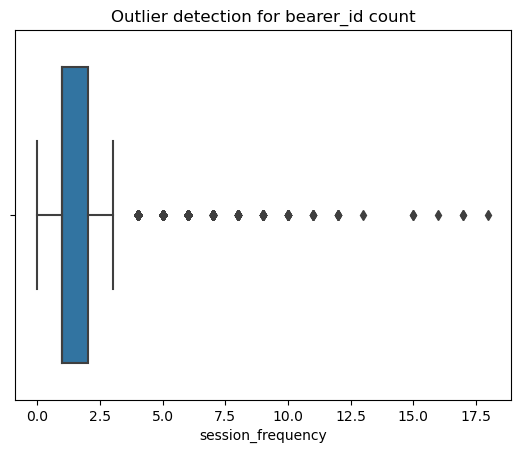

In [17]:
sns.boxplot(data=engagement_metrics, x='session_frequency').set(title="Outlier detection for bearer_id count")

[Text(0.5, 1.0, 'Outlier detection for Total duration')]

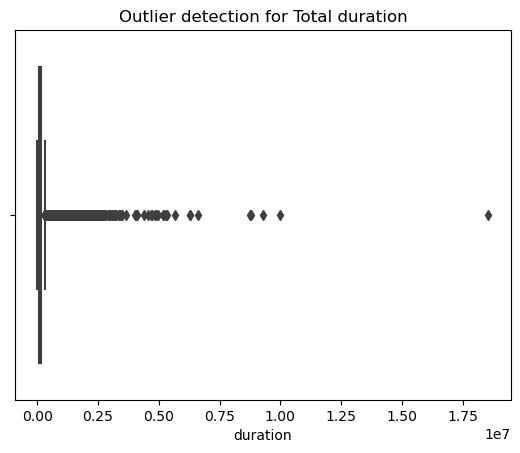

In [18]:
sns.boxplot(data=engagement_metrics, x='duration').set(title="Outlier detection for Total duration")

[Text(0.5, 1.0, 'Outlier detection for Total_data')]

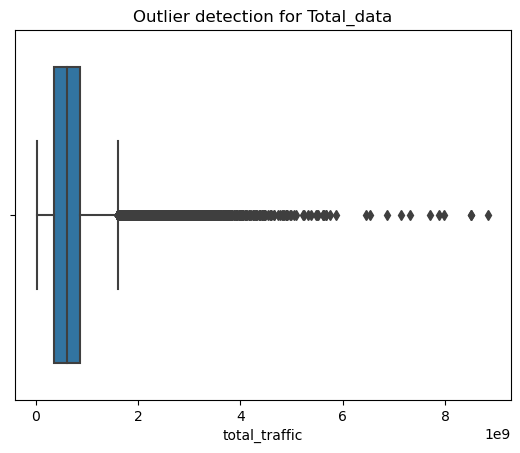

In [19]:
sns.boxplot(data=engagement_metrics, x='total_traffic').set(title="Outlier detection for Total_data")

* There are outliers present in above three metrics.
* We are dealing with the outliers in upcoming steps

In [20]:
def handle_outliers(df1, col):
    df1 = df1.copy()
    q1 = df1[col].quantile(0.25)
    q2 = df1[col].quantile(0.50)
    q3 = df1[col].quantile(0.75)
    
    iqr=q3-q1
    lower_range=q1-iqr*1.5
    upper_range=q3+iqr*1.5
    
    df1[col] = np.where(df1[col] < lower_range, lower_range, df1[col])
    df1[col] = np.where(df1[col] > upper_range, upper_range, df1[col])
    
    return df1

In [21]:
new_engagement_metrics = handle_outliers(engagement_metrics, 'session_frequency')
new_engagement_metrics = handle_outliers(new_engagement_metrics, 'duration')
new_engagement_metrics = handle_outliers(new_engagement_metrics, 'total_traffic')

In [22]:
new_engagement_metrics.describe().style.background_gradient(cmap = "Oranges")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,1.355572,130253.994394,663626341.975427
std,0.658101,87611.985353,395927394.547047
min,0.000000,7142.000000,33249009.000000
25%,1.000000,71308.000000,358549907.500000
50%,1.000000,102740.000000,617923138.000000
75%,2.000000,172799.000000,857435147.750000
max,3.500000,325035.500000,1605763008.125000


[Text(0.5, 1.0, 'Outlier detection for bearer_id count')]

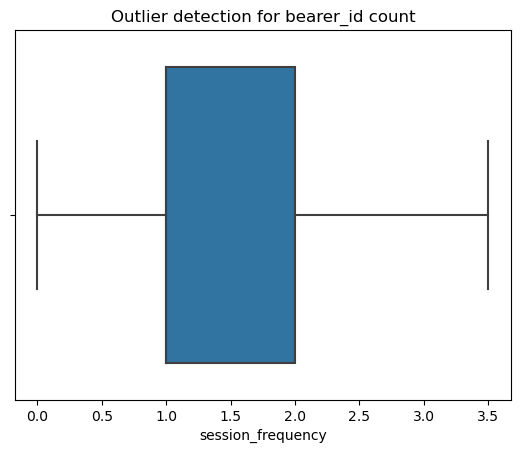

In [23]:
sns.boxplot(data=new_engagement_metrics, x='session_frequency').set(title="Outlier detection for bearer_id count")

[Text(0.5, 1.0, 'Outlier detection for Total duration')]

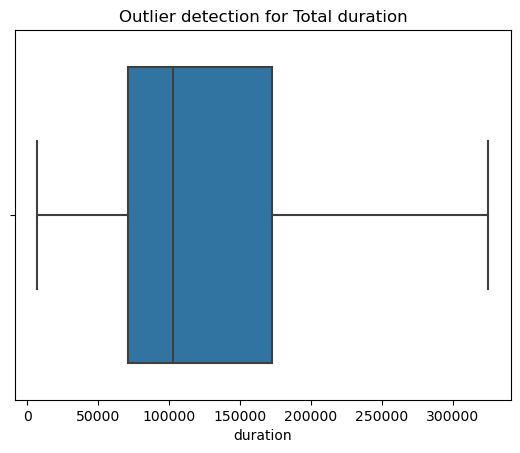

In [24]:
sns.boxplot(data=new_engagement_metrics, x='duration').set(title="Outlier detection for Total duration")

[Text(0.5, 1.0, 'Outlier detection for Total_data')]

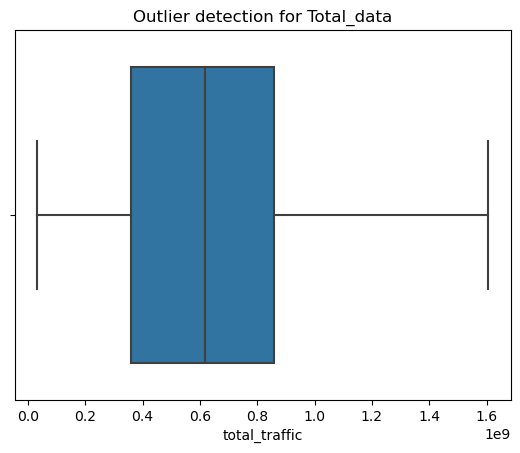

In [25]:
sns.boxplot(data=new_engagement_metrics, x='total_traffic').set(title="Outlier detection for Total_data")

### • Plot the top 3 most used applications using appropriate charts.

In [26]:
app_metrics = []

app_columns = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming']

app_metrics = df1.groupby('msisdn').agg({'social_media': 'sum', 'google': 'sum', 'email': 'sum',
                                        'youtube': 'sum', 'netflix': 'sum', 'gaming': 'sum'})

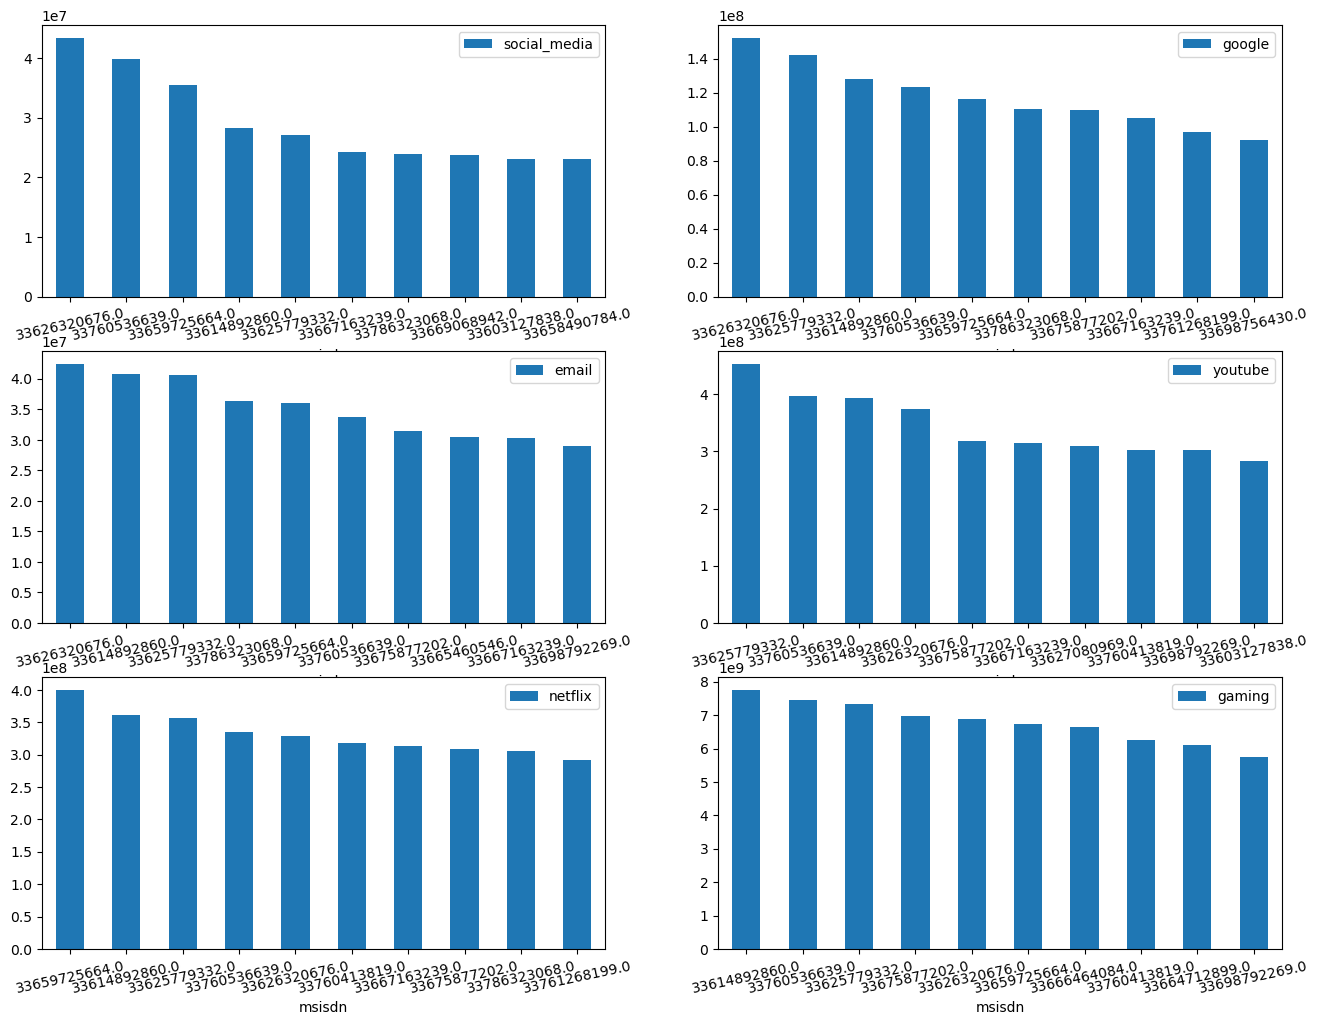

In [27]:
figure, axes = plt.subplots(3, 2, figsize=(16,12))

count = 0
for app_metric in app_metrics:
    
    x = app_metrics[[app_metric]].sort_values(by = [app_metric],
                                              ascending=False).head(10)
    x.plot.bar(y=app_metric, ax=axes[(count//2), count%2], rot=12)
    count += 1

In [28]:
total_app_df = pd.DataFrame(columns=['app', 'total'])
total_app_df['app'] = app_columns

app_metrics
apps_total = []

for app in app_columns:
    apps_total.append(app_metrics.sum()[app])
total_app_df['total'] =apps_total
    
total_app_df

,app,total
0,social_media,2.722655e+11
1,google,1.162853e+12
2,email,3.364677e+11
3,youtube,3.372204e+12
4,netflix,3.370060e+12
5,gaming,6.408892e+13


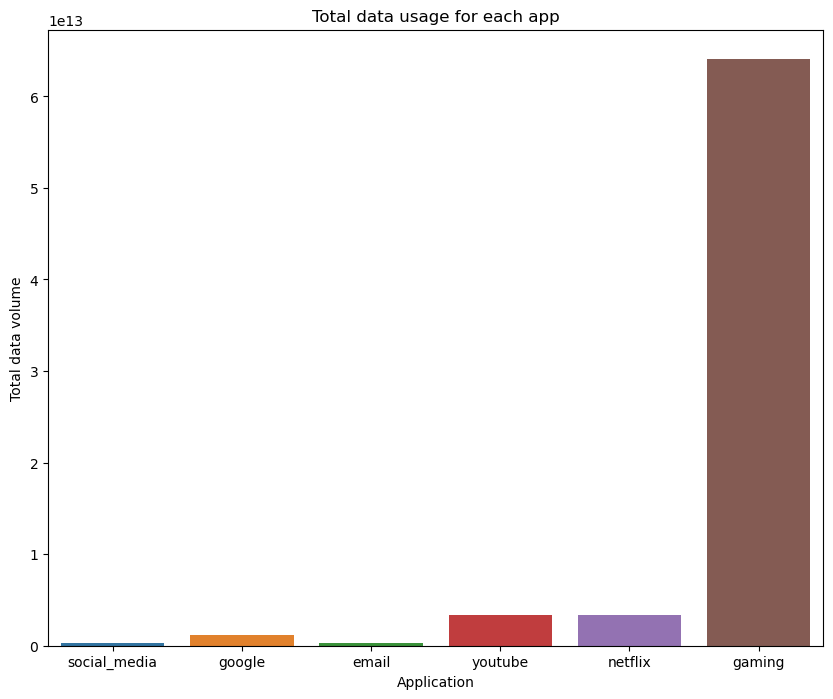

In [29]:
# Plot the results
plt.figure(figsize=(10,8))
sns.barplot(data=total_app_df, x='app', y='total')
plt.xlabel("Application")
plt.ylabel("Total data volume")
plt.title("Total data usage for each app")
plt.show()

## Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

In [30]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

In [31]:
metrics_to_normalize = new_engagement_metrics[['session_frequency', 'duration', 'total_traffic']]  # Specify the columns to normalize
scaler = MinMaxScaler()

norm_metrics = scaler.fit_transform(metrics_to_normalize)
normalized_metrics = pd.DataFrame(norm_metrics, columns=metrics_to_normalize.columns)
print(normalized_metrics)

        session_frequency  duration  total_traffic
0                0.285714  0.344700       0.537637
1                0.285714  0.547630       0.078607
2                0.285714  0.402106       0.357846
3                0.285714  0.134435       0.247420
4                0.571429  0.094252       0.905659
...                   ...       ...            ...
106851           0.285714  0.005247       0.433314
106852           0.285714  0.421040       0.284295
106853           0.285714  1.000000       0.126469
106854           0.285714  0.773492       0.358050
106855           0.285714  1.000000       0.067347

[106856 rows x 3 columns]


In [32]:
normalized_metrics.describe().style.background_gradient(cmap = "Blues")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,0.387306,0.387274,0.400872
std,0.188029,0.275602,0.251780
min,0.000000,0.000000,0.000000
25%,0.285714,0.201847,0.206867
50%,0.285714,0.300723,0.371809
75%,0.571429,0.521108,0.524120
max,1.000000,1.000000,1.000000


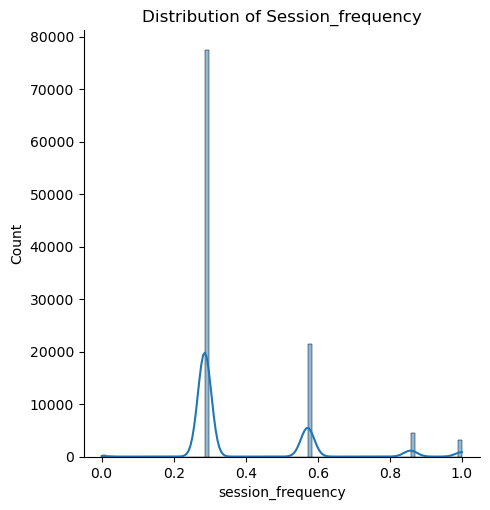

In [33]:
sns.displot(data=normalized_metrics, x='session_frequency',kde=True).set(title="Distribution of Session_frequency")

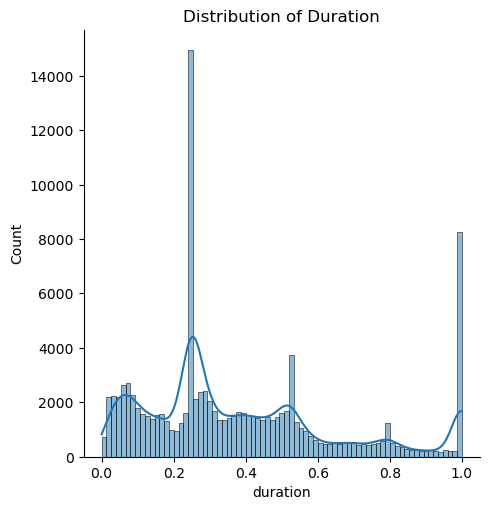

In [34]:
sns.displot(data=normalized_metrics, x='duration',kde=True).set(title="Distribution of Duration")

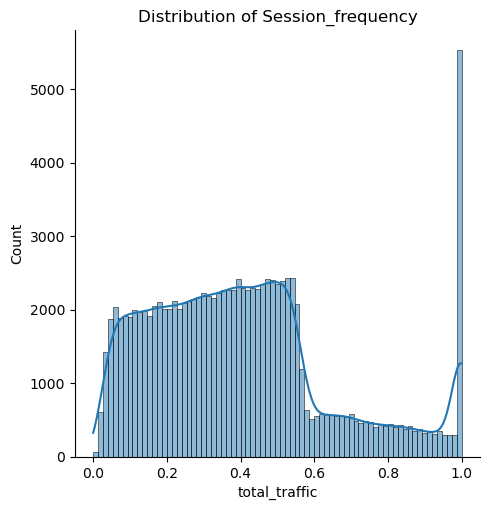

In [35]:
sns.displot(data=normalized_metrics, x='total_traffic',kde=True).set(title="Distribution of Session_frequency")

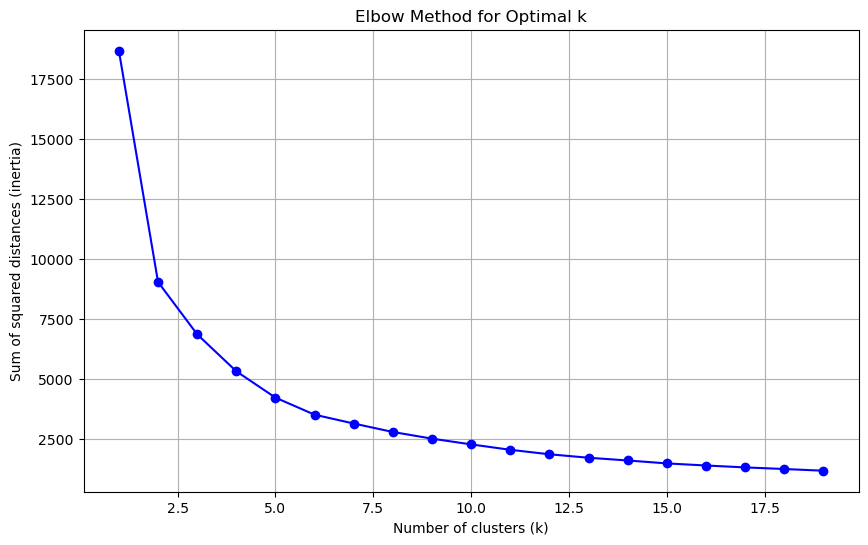

In [36]:
# Elbow Method :

# Define a range of k values to evaluate
k_values = range(1, 20)  # try different values of k from 1 to 20

# Initialize a list to store the inertia values
inertia_values = []

# Iterate over each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(normalized_metrics)
    inertia_values.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values,'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid()


* From the results of the above method, we select :

* k : Clusters = 3

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagement_metrics_with_cluster = new_engagement_metrics.copy()
engagement_metrics_with_cluster['clusters'] = pred

In [38]:
print(engagement_metrics_with_cluster['clusters'])

msisdn
3.360100e+10    1
3.360100e+10    0
3.360100e+10    0
3.360101e+10    1
3.360101e+10    1
               ..
3.379000e+10    1
3.379000e+10    0
3.197020e+12    0
3.370000e+14    0
8.823970e+14    0
Name: clusters, Length: 106856, dtype: int32


In [39]:
def cluster_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

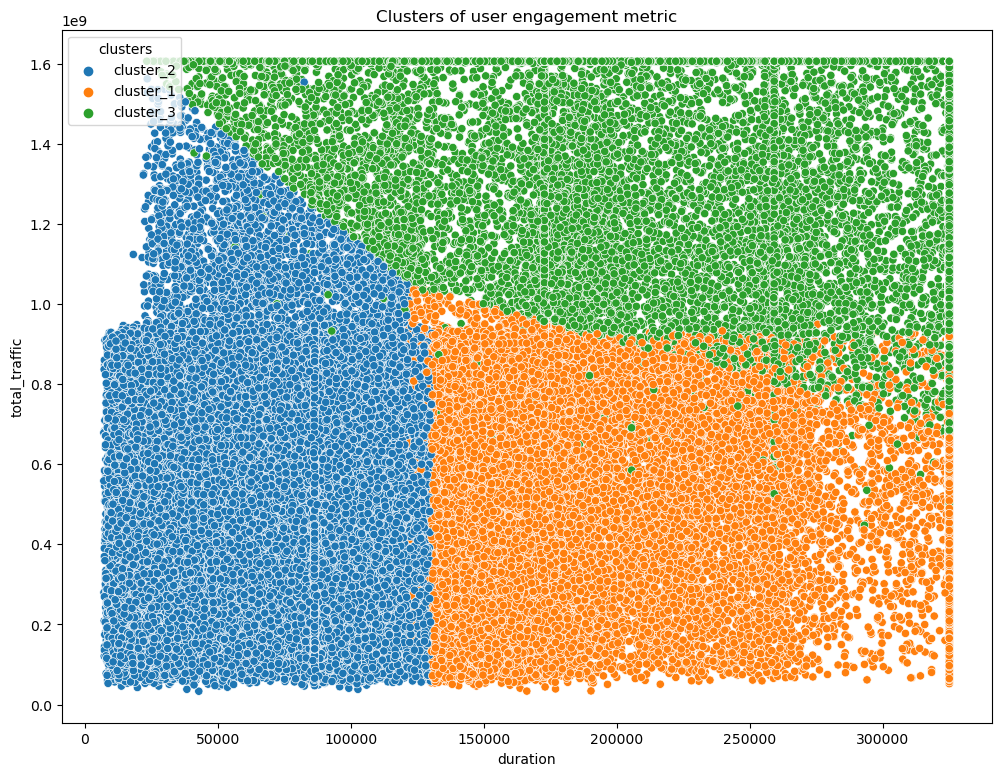

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,1.068560e+05
mean,1.355572,130253.994394,6.636263e+08
std,0.658101,87611.985353,3.959274e+08
min,0.000000,7142.000000,3.324901e+07
25%,1.000000,71308.000000,3.585499e+08
50%,1.000000,102740.000000,6.179231e+08
75%,2.000000,172799.000000,8.574351e+08
max,3.500000,325035.500000,1.605763e+09


In [40]:
labels = ['cluster_1', 'cluster_2', 'cluster_3']

engagement_metrics_with_cluster['clusters'] = engagement_metrics_with_cluster['clusters'].map(lambda x: cluster_label(x, labels))

# Now, let's count the occurrences of each cluster label
engagement_metrics_with_cluster['clusters'].value_counts()

plt.figure(figsize=(12,9))

sns.scatterplot(x = 'duration', y='total_traffic', hue='clusters',
                data=engagement_metrics_with_cluster).set_title('Clusters of user engagement metric')
plt.show()

engagement_metrics_with_cluster.describe()

In [41]:
cluster_1 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 'cluster_1']
cluster_2 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 'cluster_2']
cluster_3 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 'cluster_3']

In [42]:
cluster_1.describe()

,session_frequency,duration,total_traffic
count,27467.000000,27467.000000,2.746700e+04
mean,1.201587,188170.224870,5.265016e+08
std,0.402913,53192.182114,2.419614e+08
min,0.000000,121825.000000,3.357584e+07
25%,1.000000,150396.000000,3.229761e+08
50%,1.000000,171983.000000,5.406123e+08
75%,1.000000,211922.500000,7.330179e+08
max,3.000000,325035.500000,1.042663e+09


In [43]:
cluster_2.describe()

,session_frequency,duration,total_traffic
count,61146.000000,61146.000000,6.114600e+04
mean,1.081003,69612.308229,5.295971e+08
std,0.295572,32748.610908,2.684840e+08
min,0.000000,7142.000000,3.324901e+07
25%,1.000000,37699.500000,3.056584e+08
50%,1.000000,84952.000000,5.284153e+08
75%,1.000000,90263.750000,7.418098e+08
max,3.000000,134947.000000,1.561850e+09


In [44]:
cluster_3.describe()

,session_frequency,duration,total_traffic
count,18243.000000,18243.000000,1.824300e+04
mean,2.507702,246310.094803,1.319317e+09
std,0.619511,79124.858369,2.645583e+08
min,1.000000,23292.000000,4.070312e+08
25%,2.000000,176850.500000,1.102241e+09
50%,2.000000,259198.000000,1.352246e+09
75%,3.000000,325035.500000,1.605763e+09
max,3.500000,325035.500000,1.605763e+09


# Task 3 - Experience Analytics

## Task 3.1 - Aggregate, per customer, the following information:

• Average TCP retransmission

• Average RTT

• Handset type

• Average throughput

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   duration                                  150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn                                    148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

###  We need to combine the total UL and Dl data and Create a new DataFrame

In [46]:
df1["tcp_retrans"] = df1["tcp_dl_retrans._vol_(bytes)"] + df1['tcp_ul_retrans._vol_(bytes)']
df1["avg_rtt"] = df1["avg_rtt_dl_(ms)"] + df1["avg_rtt_ul_(ms)"]
df1['avg_tp'] = df1["avg_bearer_tp_dl_(kbps)"] + df1["avg_bearer_tp_ul_(kbps)"]

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 66 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   duration                                  150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn                                    148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [48]:
# Replace missing values and outliers with the mean or mode of the corresponding variable
df1.isnull().sum()

bearer_id        991
start              1
start_ms           1
end                1
end_ms             1
               ...  
other              0
total_data         1
tcp_retrans    99530
avg_rtt        27840
avg_tp             1
Length: 66, dtype: int64

In [49]:
df1['tcp_retrans'].fillna(df1['tcp_retrans'].mean(), inplace=True)

df1['avg_rtt'].fillna(df1['avg_rtt'].mean(), inplace=True)

df1['avg_tp'].fillna(df1['avg_tp'].mean(), inplace=True)

df1['handset_type'].fillna(df1['handset_type'].mode()[0], inplace=True)

In [50]:
df1.isnull().sum()

bearer_id      991
start            1
start_ms         1
end              1
end_ms           1
              ... 
other            0
total_data       1
tcp_retrans      0
avg_rtt          0
avg_tp           0
Length: 66, dtype: int64

In [51]:
# Group by customer (msisdn ) and calculate the average of each variable
agg_df = df1.groupby('msisdn').agg({
    'tcp_retrans': 'mean',
    'avg_rtt': 'mean',
    'handset_type': 'first',
    'avg_tp': 'mean'
}).reset_index()
print(agg_df)

              msisdn   tcp_retrans     avg_rtt  \
0       3.360100e+10  2.571697e+07   46.000000   
1       3.360100e+10  2.571697e+07   31.000000   
2       3.360100e+10  2.571697e+07  127.024885   
3       3.360101e+10  2.571697e+07   84.000000   
4       3.360101e+10  1.754390e+07   59.500000   
...              ...           ...         ...   
106851  3.379000e+10  2.180450e+05   52.000000   
106852  3.379000e+10  2.571697e+07   40.000000   
106853  3.197020e+12  2.571697e+07  127.024885   
106854  3.370000e+14  2.571697e+07  127.024885   
106855  8.823970e+14  2.571697e+07  127.024885   

                            handset_type   avg_tp  
0         Huawei P20 Lite Huawei Nova 3E     76.0  
1                 Apple iPhone 7 (A1778)     99.0  
2                              undefined     97.0  
3                Apple iPhone 5S (A1457)    248.0  
4                Apple iPhone Se (A1723)  28422.0  
...                                  ...      ...  
106851               Huawei Honor 9

In [52]:
agg_df.head(10).style.background_gradient(cmap = "Oranges")

,msisdn,tcp_retrans,avg_rtt,handset_type,avg_tp
0,33601001722.000000,25716966.336391,46.000000,Huawei P20 Lite Huawei Nova 3E,76.000000
1,33601001754.000000,25716966.336391,31.000000,Apple iPhone 7 (A1778),99.000000
2,33601002511.000000,25716966.336391,127.024885,undefined,97.000000
3,33601007832.000000,25716966.336391,84.000000,Apple iPhone 5S (A1457),248.000000
4,33601008617.000000,17543899.168196,59.500000,Apple iPhone Se (A1723),28422.000000
5,33601010682.000000,25716966.336391,75.512443,Samsung Galaxy A8 (2018),3954.000000
6,33601011634.000000,12913599.168196,26.500000,Huawei Mate 10 Pro Porsche Design Huawei Mate 10,21256.500000
7,33601011959.000000,25716966.336391,52.000000,Samsung Galaxy S8 Plus (Sm-G955F),1247.000000
8,33601014694.000000,25716966.336391,127.024885,undefined,94.500000
9,33601020306.000000,25716966.336391,62.000000,Apple iPhone X (A1865),146.000000


## Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

In [53]:
# Compute the top, bottom, and most frequent values for TCP
top_tcp = df1['tcp_retrans'].nlargest(10)
bottom_tcp = df1['tcp_retrans'].nsmallest(10)
most_frequent_tcp = df1['tcp_retrans'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for RTT
top_rtt = df1['avg_rtt'].nlargest(10)
bottom_rtt = df1['avg_rtt'].nsmallest(10)
most_frequent_rtt = df1['avg_rtt'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for throughput
top_throughput = df1['avg_tp'].nlargest(10)
bottom_throughput = df1['avg_tp'].nsmallest(10)
most_frequent_throughput = df1['avg_tp'].value_counts().head(10)

# Print the results
print("*"*50)
print("Top TCP values:")
print(top_tcp)
print("\nBottom TCP values:")
print(bottom_tcp)
print("\nMost frequent TCP values:")
print(most_frequent_tcp)
print("*"*50)

print("*"*50)
print("\nTop RTT values:")
print(top_rtt)
print("\nBottom RTT values:")
print(bottom_rtt)
print("\nMost frequent RTT values:")
print(most_frequent_rtt)
print("*"*50)

print("*"*50)
print("\nTop throughput values:")
print(top_throughput)
print("\nBottom throughput values:")
print(bottom_throughput)
print("\nMost frequent throughput values:")
print(most_frequent_throughput)
print("*"*50)


**************************************************
Top TCP values:
34636     4.344116e+09
140797    4.301477e+09
77950     4.294432e+09
135677    4.291465e+09
3741      4.288121e+09
119667    4.275492e+09
39608     4.268647e+09
59011     4.261616e+09
76971     4.260174e+09
41182     4.254660e+09
Name: tcp_retrans, dtype: float64

Bottom TCP values:
143594     86.0
111100     97.0
18417     106.0
13142     108.0
97061     113.0
8794      128.0
99947     129.0
83214     134.0
95955     134.0
12849     143.0
Name: tcp_retrans, dtype: float64

Most frequent TCP values:
2.571697e+07    99530
2.660000e+03       29
5.320000e+03       24
6.650000e+03       20
3.990000e+03       19
7.980000e+03       14
1.873000e+03       13
2.648000e+03        9
1.596000e+04        9
1.064000e+04        8
Name: tcp_retrans, dtype: int64
**************************************************
**************************************************

Top RTT values:
30155     96924.0
29916     64641.0
17894     55812.0
596

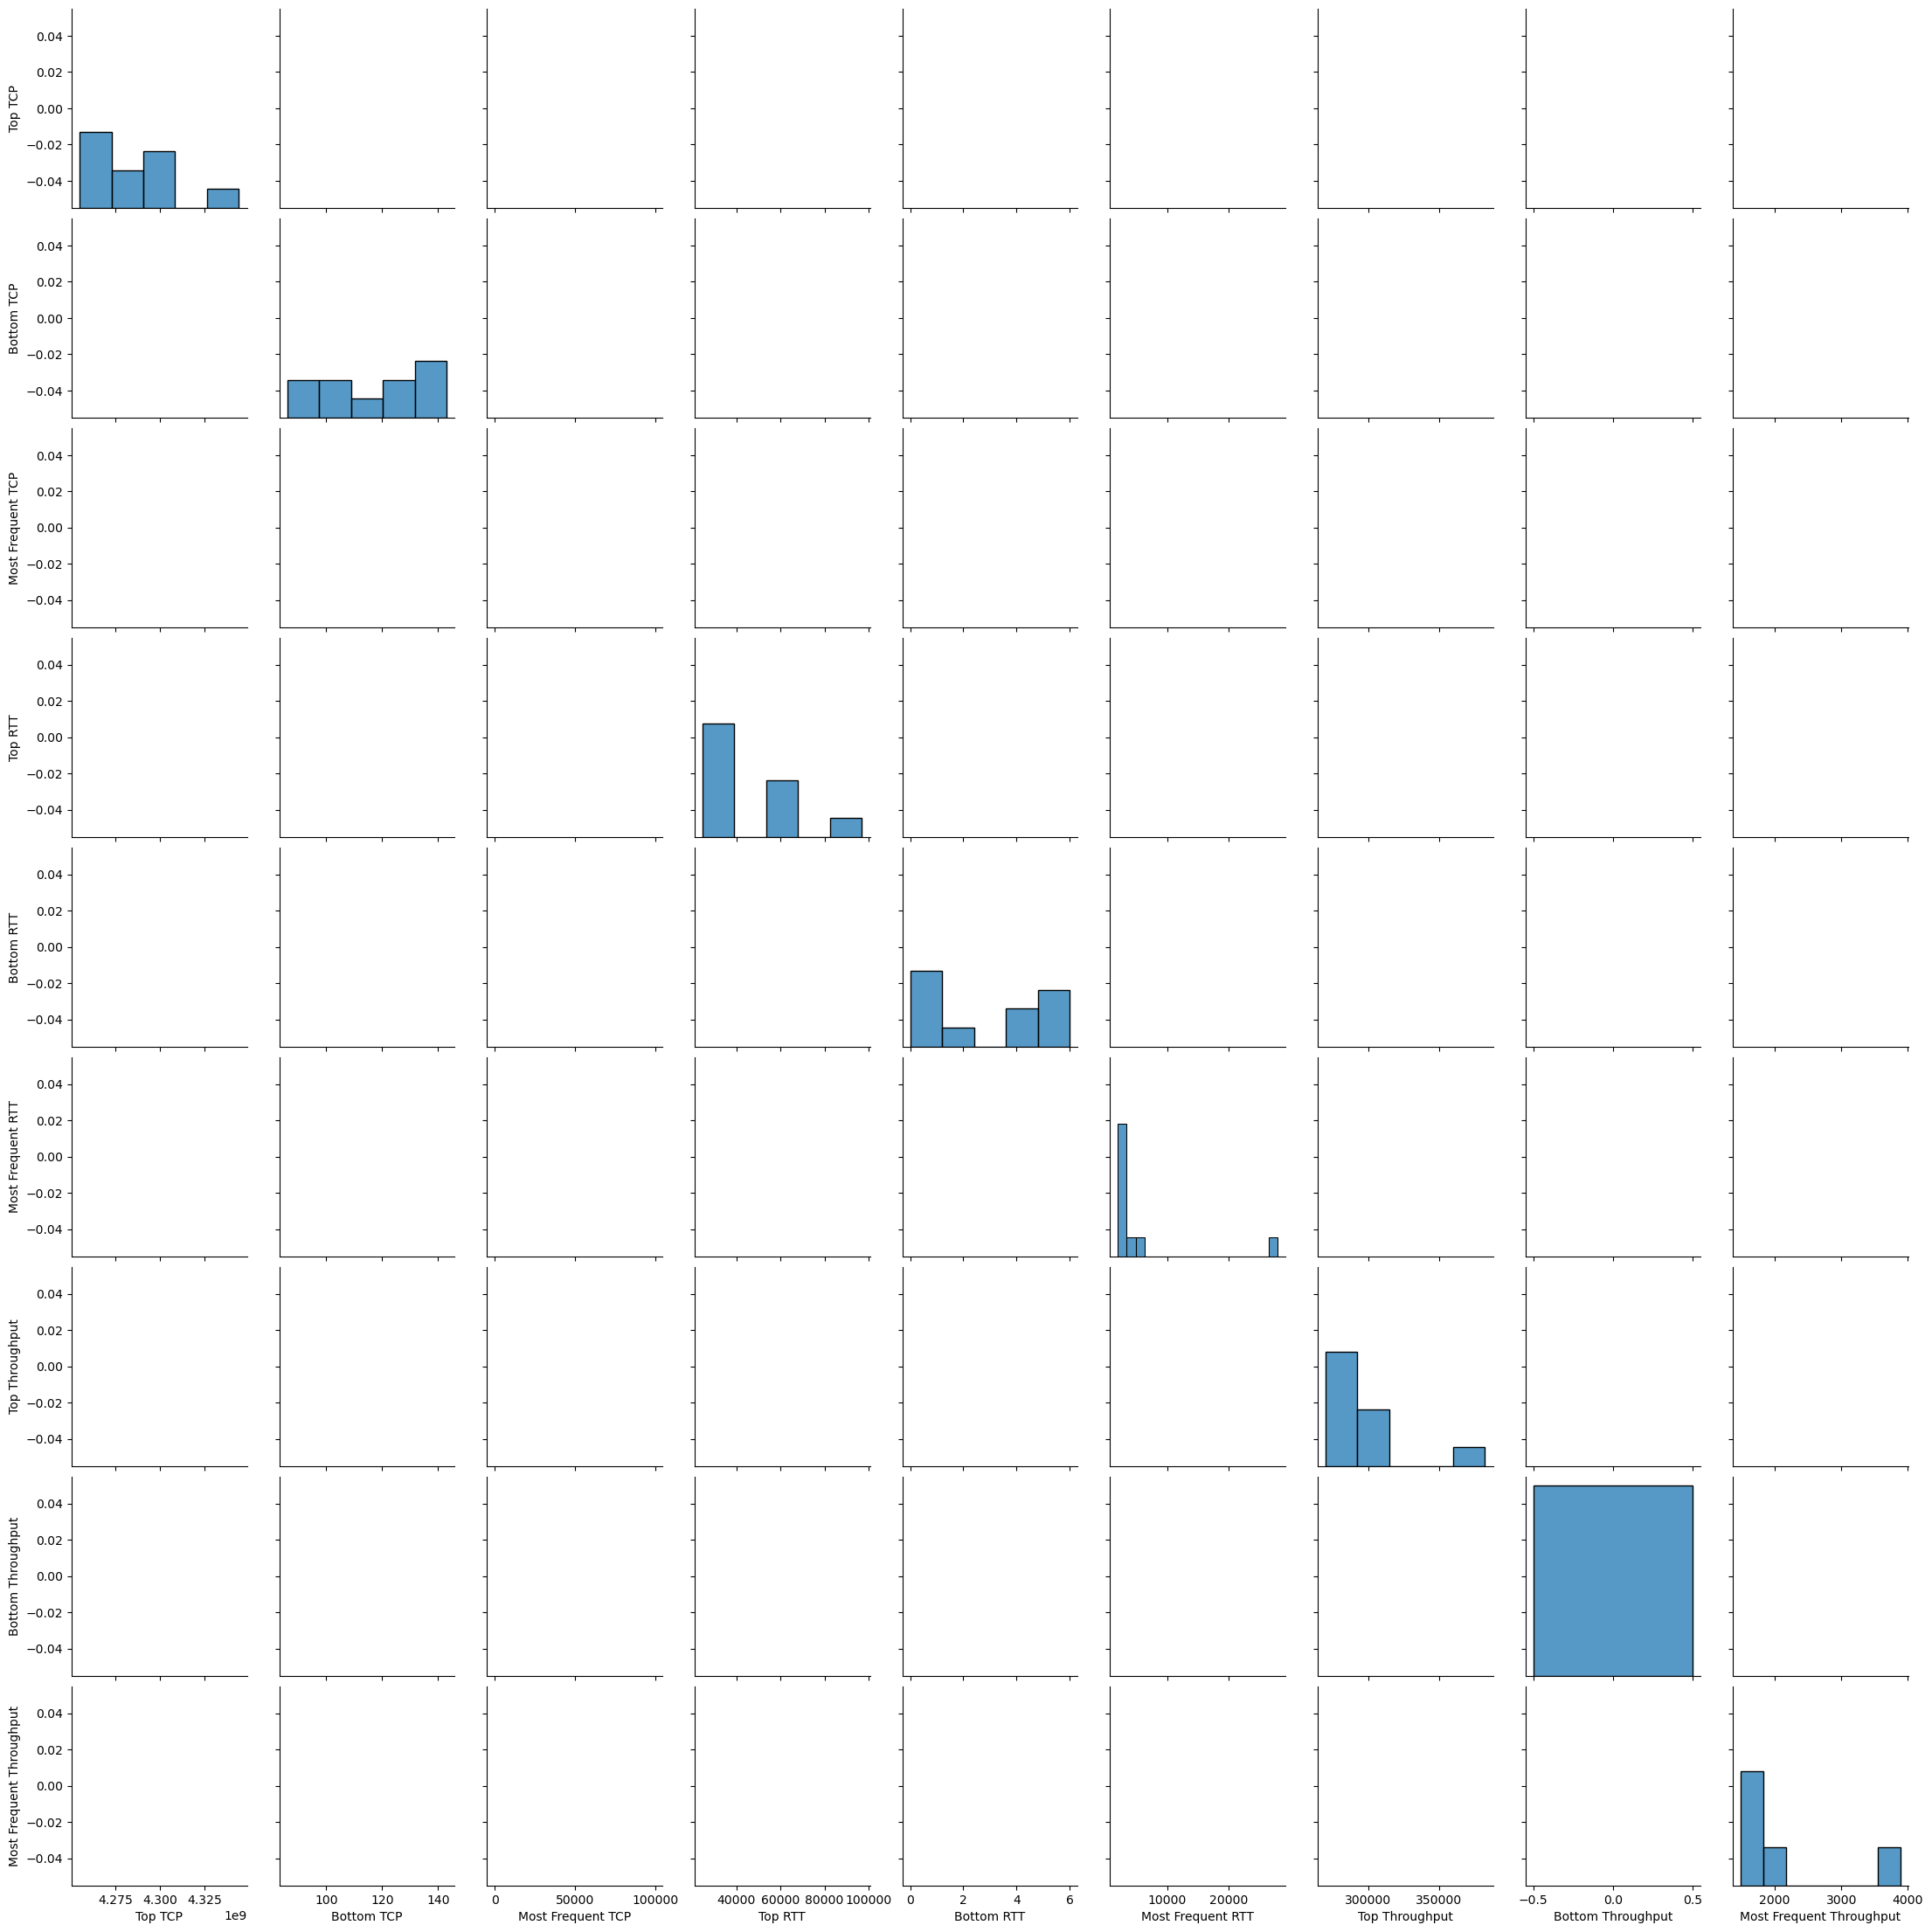

In [54]:
# Create a DataFrame with the top, bottom, and most frequent values
pairplot_df = pd.DataFrame({
    'Top TCP': top_tcp,
    'Bottom TCP': bottom_tcp,
    'Most Frequent TCP': most_frequent_tcp,
    'Top RTT': top_rtt,
    'Bottom RTT': bottom_rtt,
    'Most Frequent RTT': most_frequent_rtt,
    'Top Throughput': top_throughput,
    'Bottom Throughput': bottom_throughput,
    'Most Frequent Throughput': most_frequent_throughput
})

# Plot the pair plot
sns.pairplot(pairplot_df)
plt.show()

## Task 3.3 - Compute & report:

In [55]:
# Compute the distribution of average throughput per handset type
throughput_distribution = df1.groupby('handset_type')['avg_tp'].mean()

# Compute the average TCP retransmission view per handset type
tcp_retransmission_view = df1.groupby('handset_type')['tcp_retrans'].mean()

# Print the results
print("Distribution of Average Throughput per Handset Type:")
print(throughput_distribution)
print("\nAverage TCP Retransmission View per Handset Type:")
print(tcp_retransmission_view)


Distribution of Average Throughput per Handset Type:
handset_type
A-Link Telecom I. Cubot A5                                                             23510.000000
A-Link Telecom I. Cubot Note Plus                                                       6699.000000
A-Link Telecom I. Cubot Note S                                                          8937.000000
A-Link Telecom I. Cubot Nova                                                           56217.000000
A-Link Telecom I. Cubot Power                                                          69468.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       58.000000
Zyxel Communicat. Lte7460                                                              61956.000000
Zyxel Communicat. Sbg3600                                                              97351.000000
Zyxel Communicat. Zyxel Wah7706   

Interpretation of Average Throughput per Handset Type:

The average throughput values vary significantly across different handset types.
Handset types such as "A-Link Telecom I. Cubot Power" have a high average throughput of 69,468, while others like "A-Link Telecom I. Cubot Note Plus" have a lower average throughput of 6,699.
The range of average throughput values suggests that the performance of the network connection may differ depending on the handset type.
Interpretation of Average TCP Retransmission per Handset Type:

The average TCP retransmission values also exhibit a wide range across different handset types.
Handset types like "A-Link Telecom I. Cubot Note S" have a high average TCP retransmission value of 41,411,730, while others like "A-Link Telecom I. Cubot Power" have a much lower average TCP retransmission value of 8,041.
The variation in average TCP retransmission values suggests differences in the stability and reliability of the network connection for different handset types.
It's important to note that the "undefined" category appears in both distributions, indicating some missing or undefined handset types. The average values for this category are 10,060.61 for average throughput and 21,018,730 for TCP retransmission. This suggests that there might be some inconsistencies or incomplete data in the dataset for these cases.

Overall, these distributions provide insights into the average performance of different handset types in terms of throughput and TCP retransmission. Further analysis and comparison between handset types can help identify patterns or relationships between the handset type and the network performance metrics.

### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [56]:
from sklearn.preprocessing import StandardScaler
# Normalize the experience  metrics
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df1[['avg_tp', 'tcp_retrans', 'avg_rtt']]), columns=['avg_tp', 'tcp_retrans', 'avg_rtt'], index=df.index)
normalized_df

,avg_tp,tcp_retrans,avg_rtt
0,0.000175,0.00592,0.000485
1,0.000110,0.00592,0.000722
2,0.000039,0.00592,0.001311
3,0.000230,0.00592,0.001311
4,0.000039,0.00592,0.001311
...,...,...,...
149996,0.000306,0.00592,0.000330
149997,0.000201,0.00592,0.000299
149998,0.000235,0.00592,0.000506
149999,0.000186,0.00592,0.000433


In [59]:
# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
df1['cluster'] = kmeans.fit_predict(normalized_df)

# Interpret the clusters
cluster_means = df1.groupby('cluster')[['avg_tp', 'tcp_retrans','avg_rtt']].mean()
print("Cluster Means:")
print(cluster_means)

experience_metrics_with_cluster = agg_df.copy()
experience_metrics_with_cluster['clusters'] = df1['cluster']


Cluster Means:
               avg_tp   tcp_retrans     avg_rtt
cluster                                        
0         2108.422590  2.297133e+07  131.888689
1        95969.965871  9.321282e+07   97.346482
2        40952.477580  1.728827e+07  117.125832


In [60]:
print(experience_metrics_with_cluster['clusters'])

0         0
1         0
2         0
3         0
4         0
         ..
106851    0
106852    0
106853    0
106854    0
106855    0
Name: clusters, Length: 106856, dtype: int32


Cluster Means:
               avg_tp   tcp_retrans     avg_rtt
cluster                                        
0         2108.422590  2.297133e+07  131.888689
1        40952.477580  1.728827e+07  117.125832
2        95969.965871  9.321282e+07   97.346482


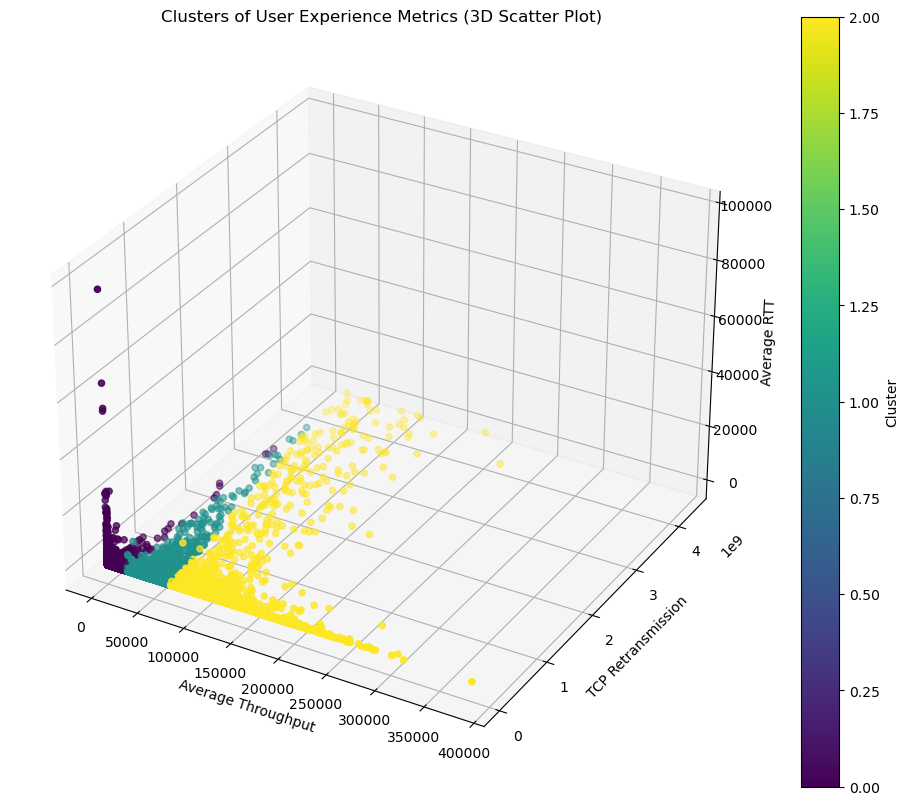

In [61]:
from mpl_toolkits.mplot3d import Axes3D

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
df1['cluster'] = kmeans.fit_predict(normalized_df)

# Interpret the clusters
cluster_means = df1.groupby('cluster')[['avg_tp', 'tcp_retrans', 'avg_rtt']].mean()
print("Cluster Means:")
print(cluster_means)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x = df1['avg_tp']
y = df1['tcp_retrans']
z = df1['avg_rtt']
c = df1['cluster']

scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=20)

ax.set_xlabel('Average Throughput')
ax.set_ylabel('TCP Retransmission')
ax.set_zlabel('Average RTT')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
plt.title('Clusters of User Experience Metrics (3D Scatter Plot)')
plt.show()

experience_metrics_with_cluster = agg_df.copy()
experience_metrics_with_cluster['clusters'] = df1['cluster']


Cluster 0:

Average Throughput (avg_tp): 2108.42
TCP Retransmission (tcp_retrans): 22,971,330
Average Round-Trip Time (avg_rtt): 131.89
In this cluster, the average throughput is relatively low compared to the other clusters. The TCP retransmission rate is also lower than the other clusters but still significant. The average round-trip time is the highest among all the clusters, indicating a longer delay in communication between the client and server.

Cluster 1:

Average Throughput (avg_tp): 40,952.48
TCP Retransmission (tcp_retrans): 17,288,270
Average Round-Trip Time (avg_rtt): 117.13
This cluster has a significantly higher average throughput compared to the other clusters. The TCP retransmission rate is relatively low, indicating a more stable network connection. The average round-trip time is lower than in Cluster 0 but still relatively high.

Cluster 2:

Average Throughput (avg_tp): 95,969.97
TCP Retransmission (tcp_retrans): 93,212,820
Average Round-Trip Time (avg_rtt): 97.35
In this cluster, the average throughput is the highest among all the clusters. The TCP retransmission rate is the highest as well, indicating a higher rate of packet loss or network congestion. The average round-trip time is the lowest, suggesting faster communication between the client and server.